In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import glob

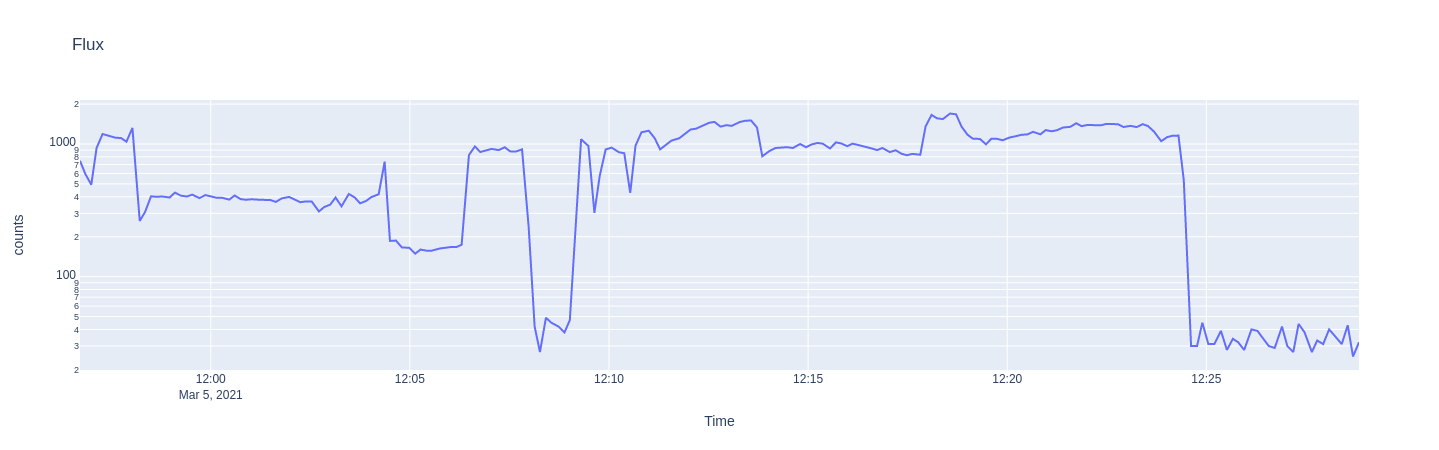

In [3]:
f='/storage/experiments/2021/0305_mikrotron/AIRDOS/run2/naitl.csv'
#f='~/git/IRRAD/SW/data/spacedos.csv'

l=[]
l.extend(range(0,262))
df = pd.read_csv(f, sep=',', names=l, header=None, comment='*',engine='python' )
df = df.reset_index(drop=True)
rc = df.loc[df[1]=='$CANDY']
rc.reset_index(drop=True, inplace=True)
rc = rc.apply(pd.to_numeric, errors='coerce')
rc['counts'] = rc.iloc[:,15:255].sum(axis=1)
rc['time'] = pd.to_datetime(rc[0], unit='s', origin='unix') 


data = [go.Scatter(x=rc['time'], y=rc['counts'])]
layout = go.Layout(title='Flux', yaxis=dict(title='counts', type='log'), xaxis=dict(title='Time'))
fig = go.Figure(data=data, layout=layout)
fig.show()

In [4]:
FROM = '2021-03-05 12:07'
TO = '2021-03-05 12:10'
rc.set_index('time', inplace=True, drop=False)
xc = rc[FROM:TO]

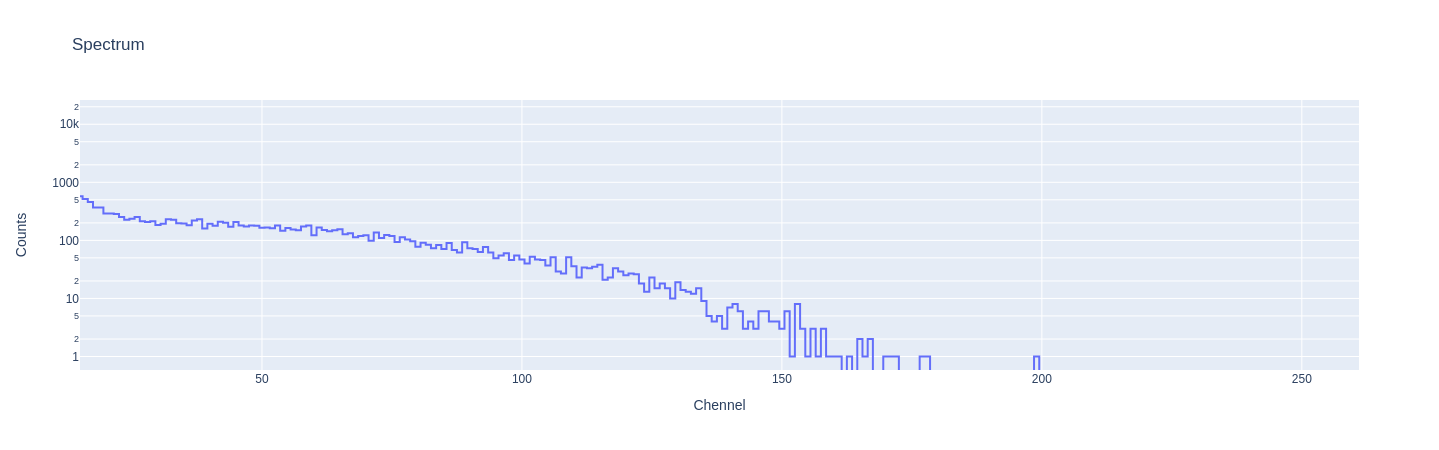

In [5]:
FROM_CAHNNEL=0
if 'cry' in f:
    FROM_CHANNEL = 13 # CRY-19
if 'naitl' in f:
    FROM_CHANNEL = 15 # NaI(Tl)
if 'spacedos' in f:
    FROM_CHANNEL = 11 # SPACEDOS

spectrum = xc.iloc[:,FROM_CHANNEL:].sum()

data = [go.Scatter(x=spectrum.index, y=spectrum, line=dict(shape='hvh'))]

layout = go.Layout(title='Spectrum', yaxis=dict(title='Counts', type='log'), xaxis=dict(title='Chennel'))
#layout = go.Layout(title='Spectrum', yaxis=dict(title='Counts'), xaxis=dict(title='Chennel'))

fig = go.Figure(data=data, layout=layout)
fig.show()

In [6]:
FROM = '2021-03-05 12:19'
TO = '2021-03-05 12:22'
rc.set_index('time', inplace=True, drop=False)
xc = rc[FROM:TO]

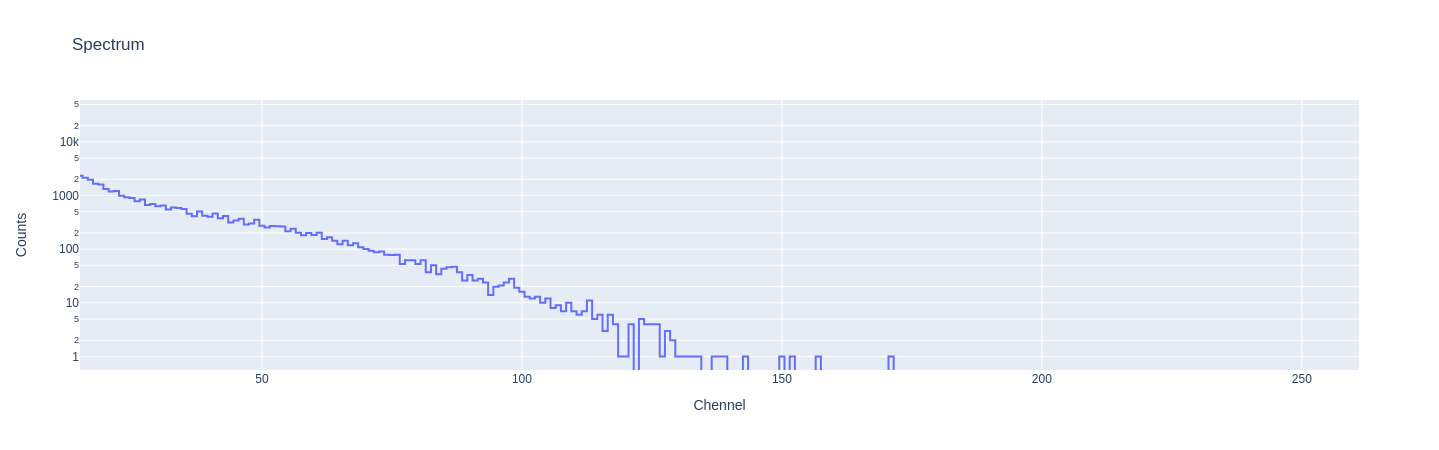

In [7]:
FROM_CAHNNEL=0
if 'cry' in f:
    FROM_CHANNEL = 13 # CRY-19
if 'naitl' in f:
    FROM_CHANNEL = 15 # NaI(Tl)
if 'spacedos' in f:
    FROM_CHANNEL = 11 # SPACEDOS

spectrum = xc.iloc[:,FROM_CHANNEL:].sum()

data = [go.Scatter(x=spectrum.index, y=spectrum, line=dict(shape='hvh'))]

layout = go.Layout(title='Spectrum', yaxis=dict(title='Counts', type='log'), xaxis=dict(title='Chennel'))
#layout = go.Layout(title='Spectrum', yaxis=dict(title='Counts'), xaxis=dict(title='Chennel'))

fig = go.Figure(data=data, layout=layout)
fig.show()

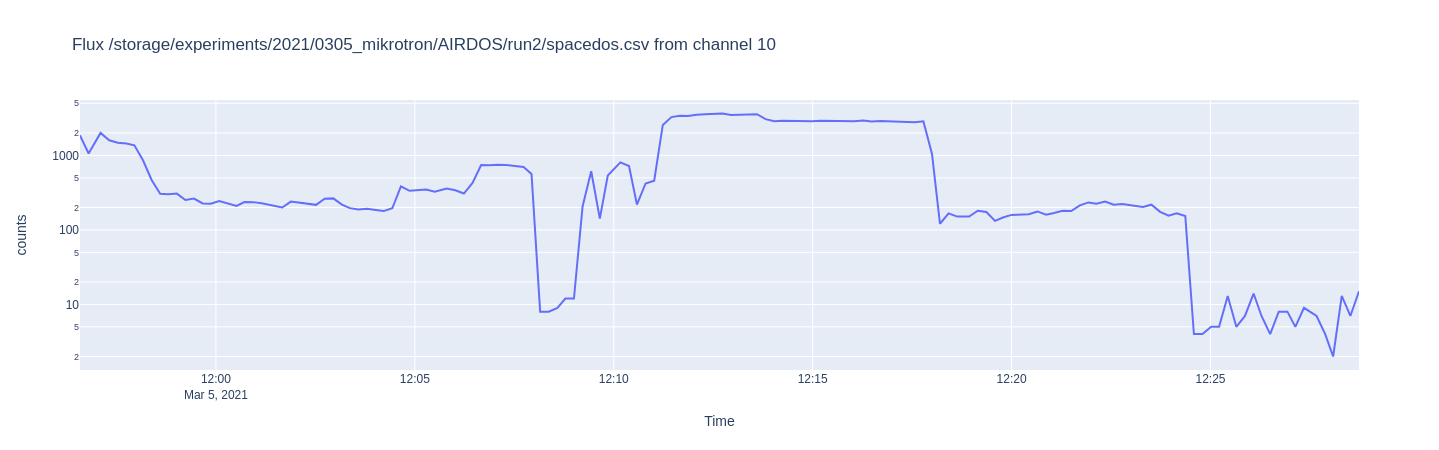

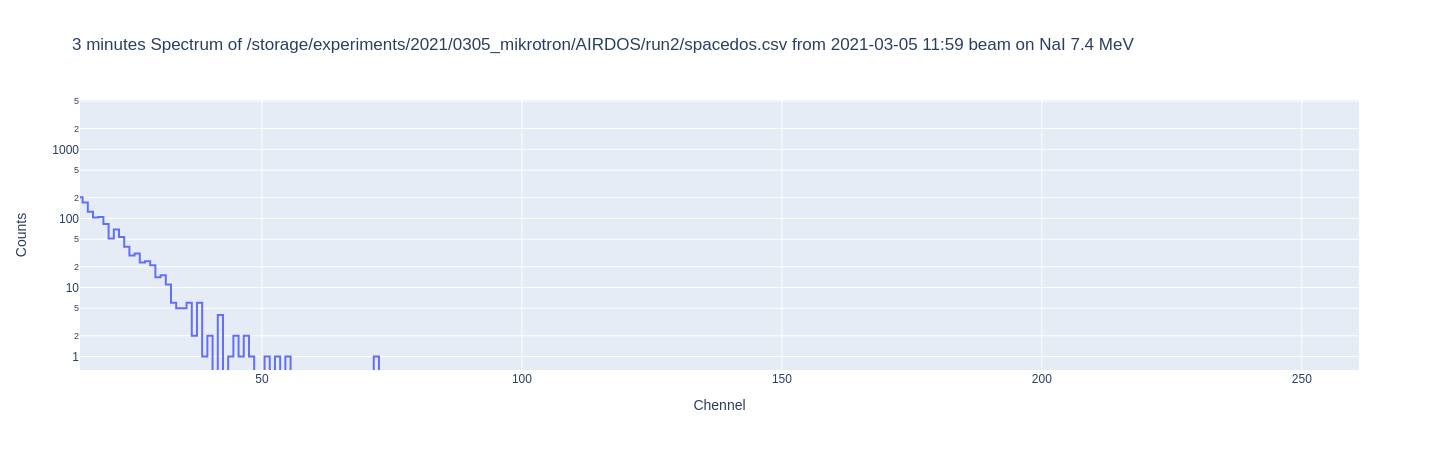

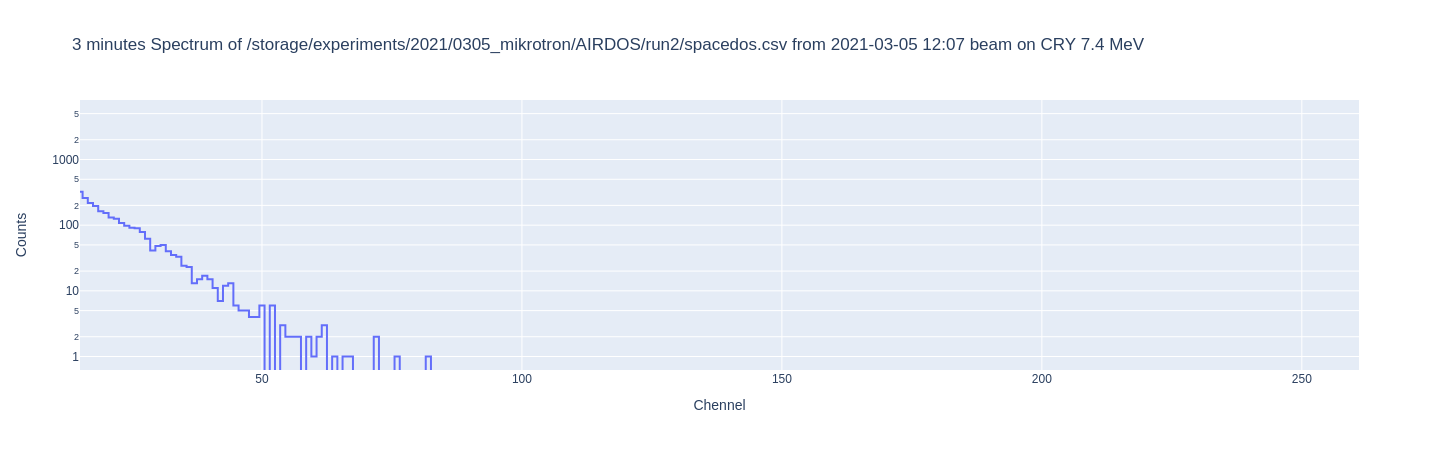

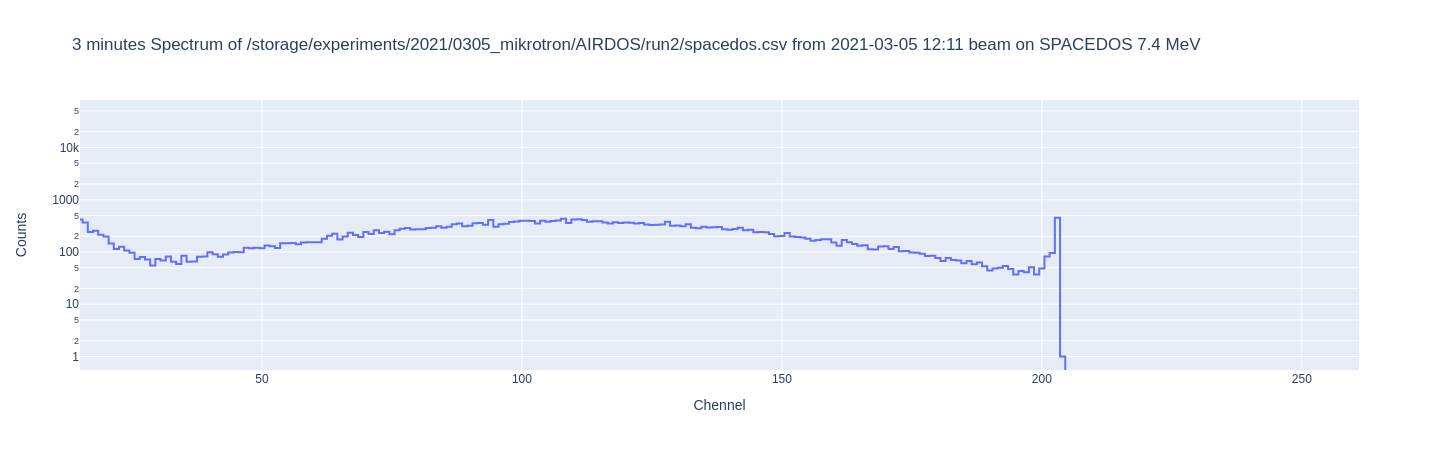

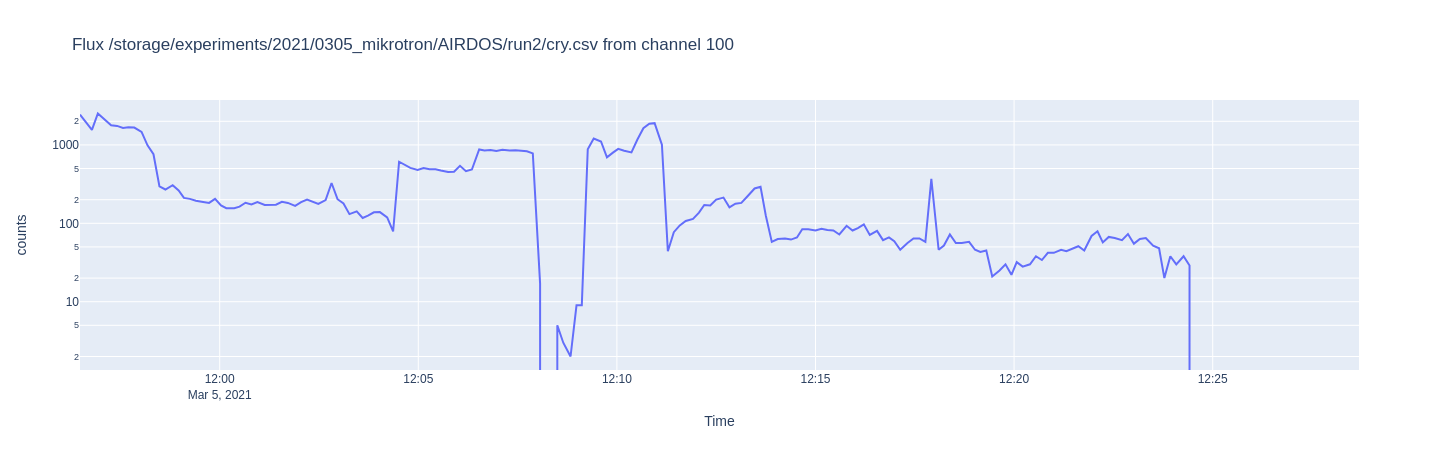

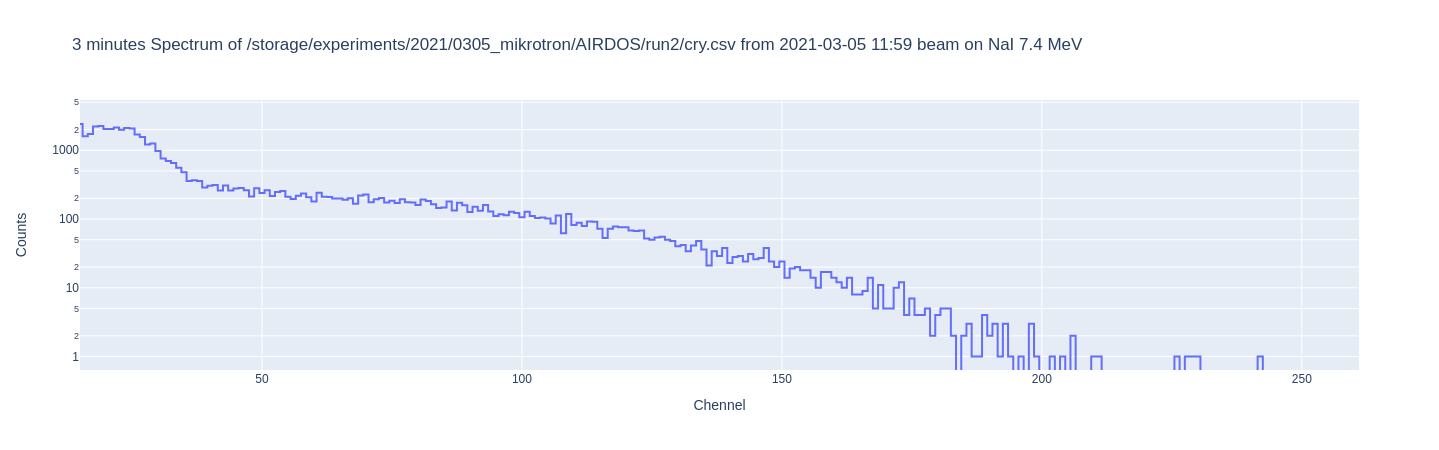

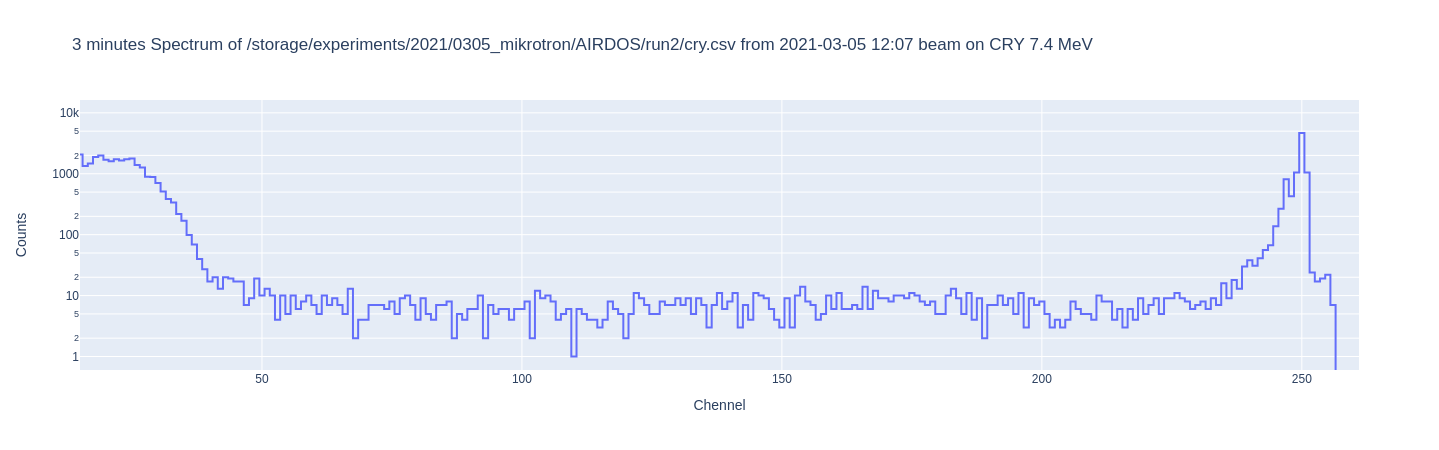

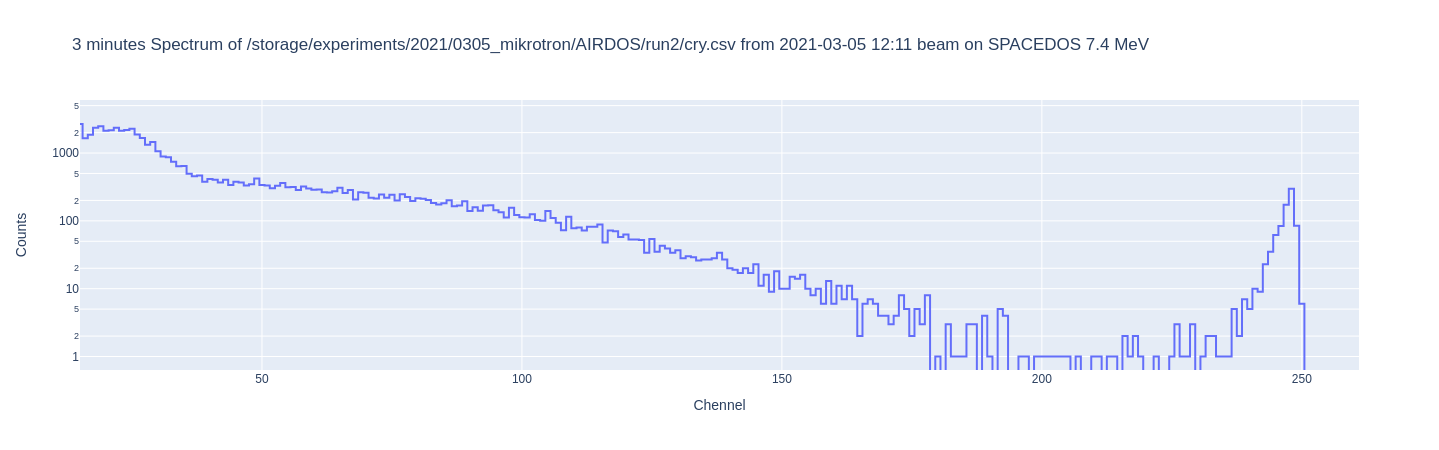

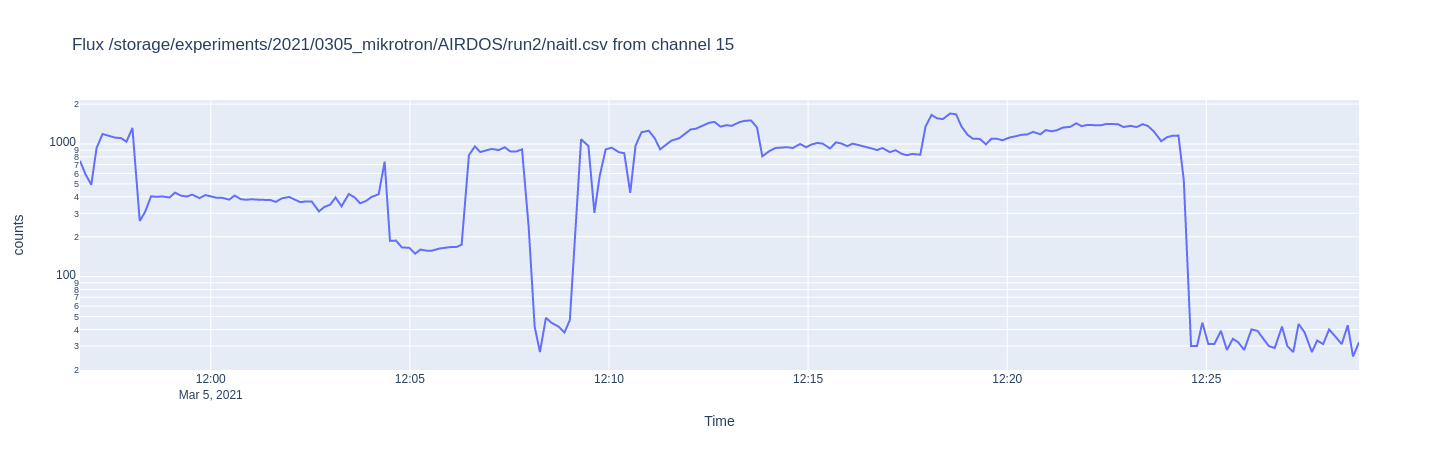

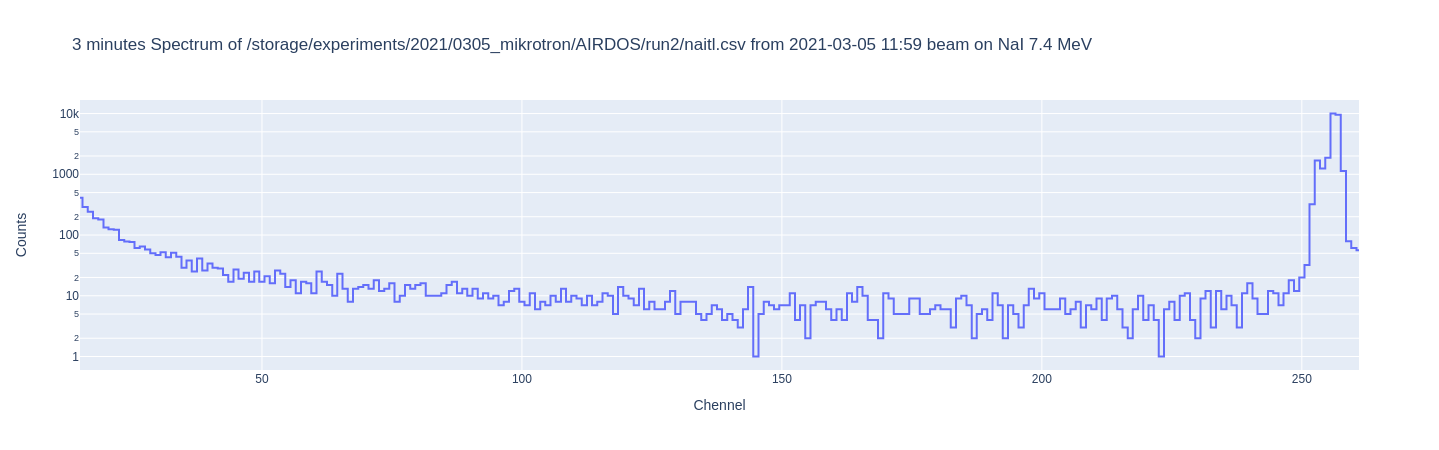

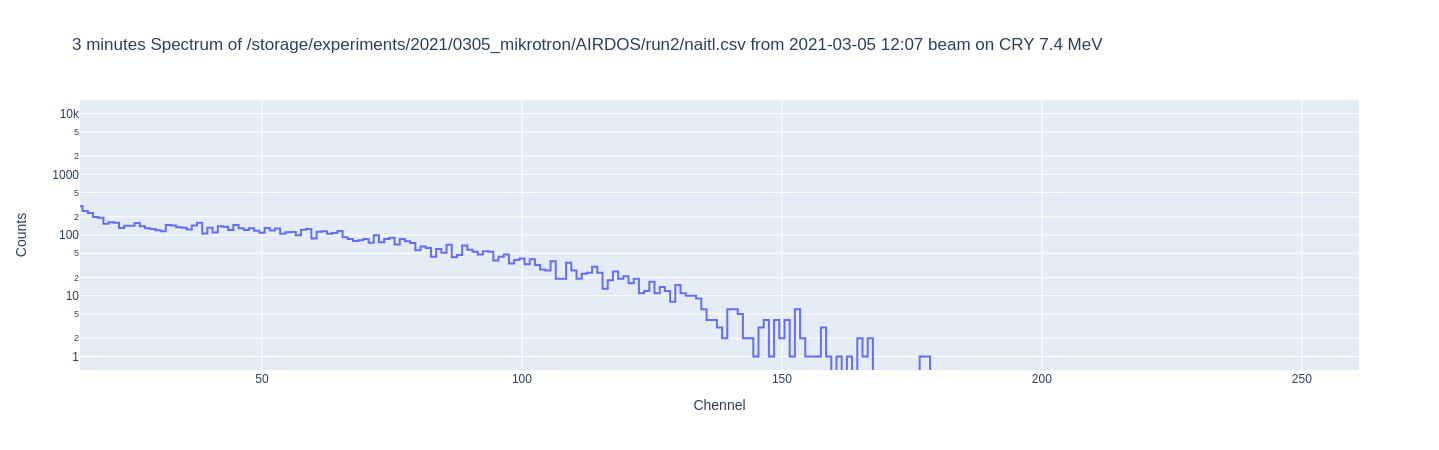

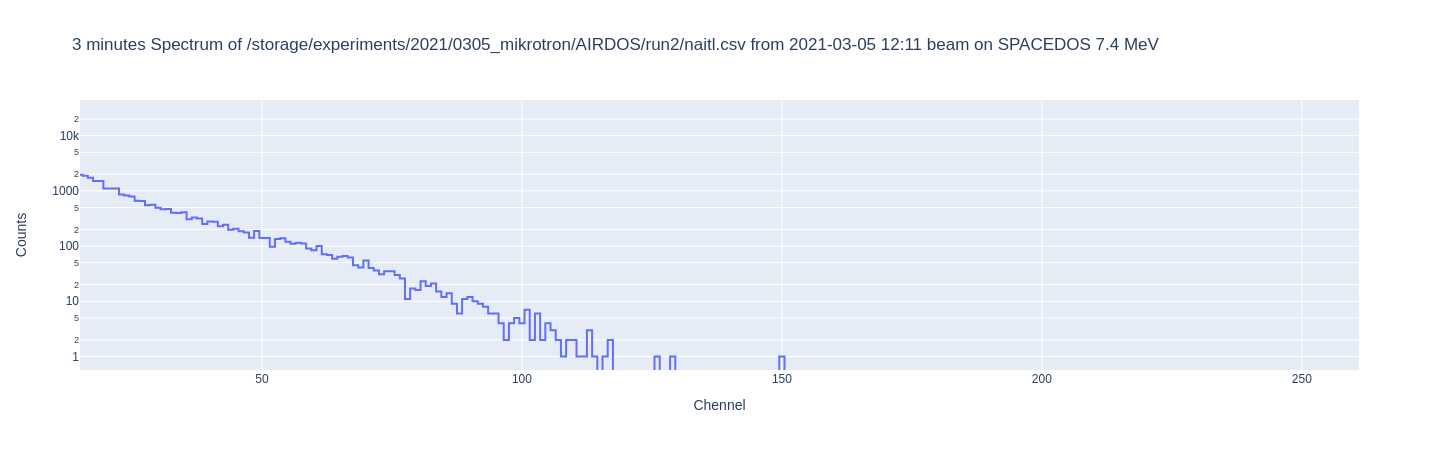

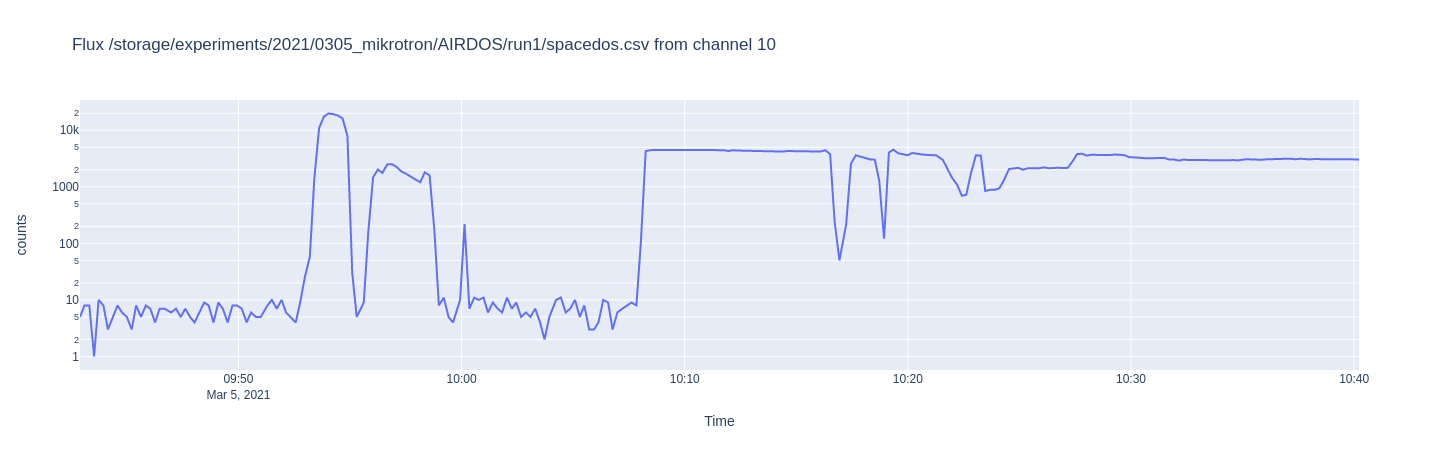

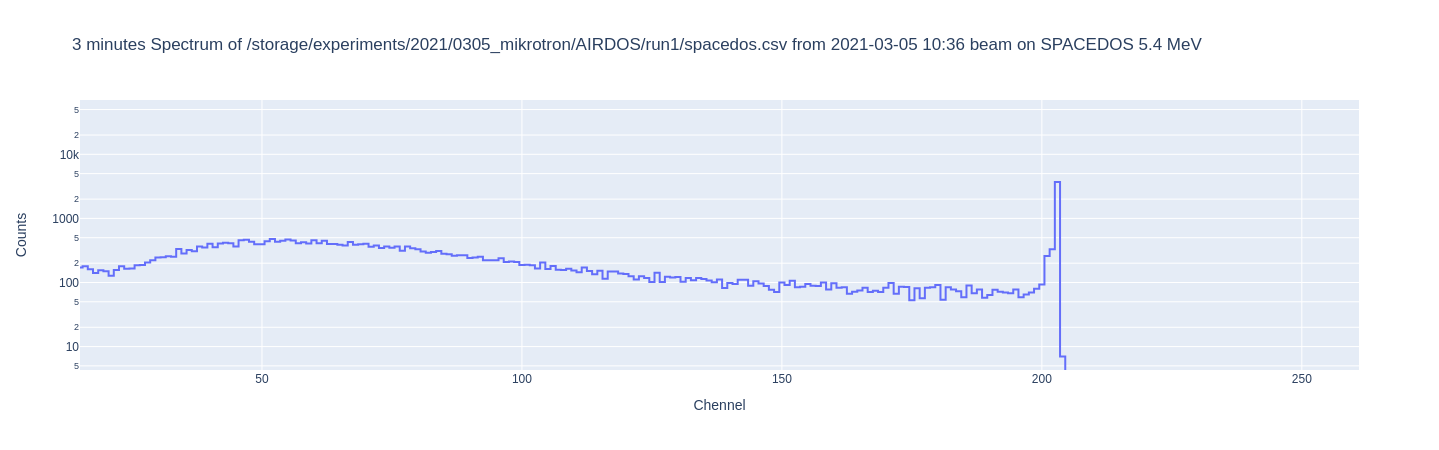

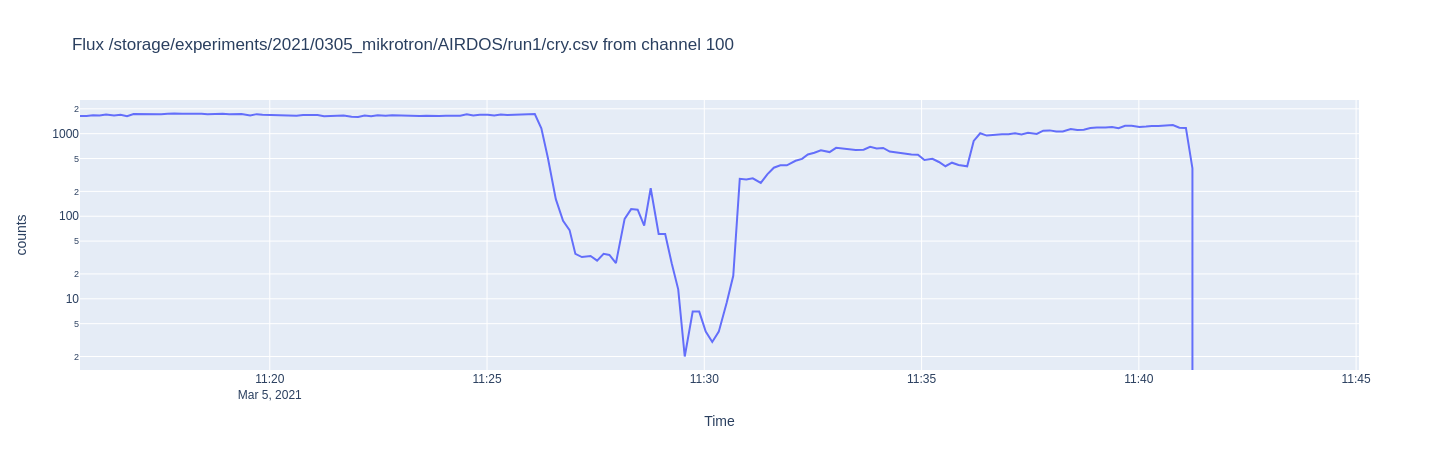

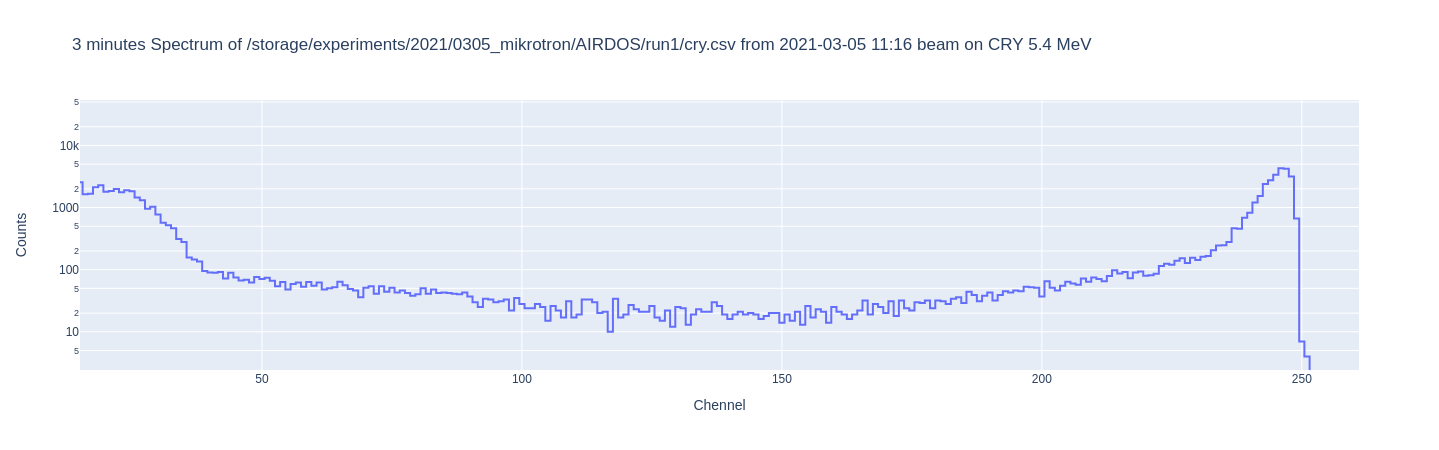

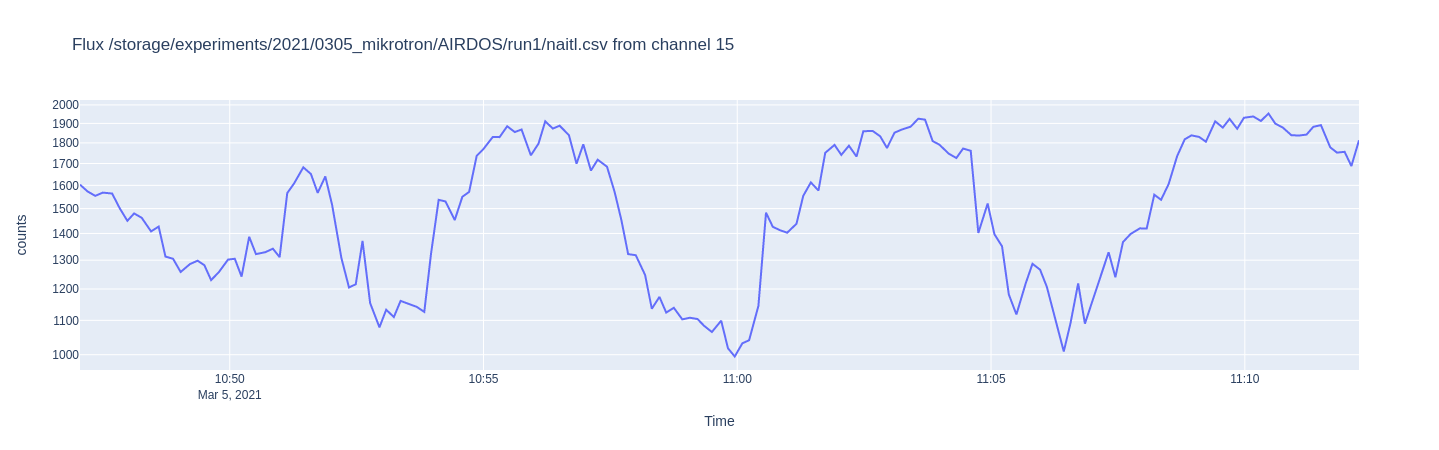

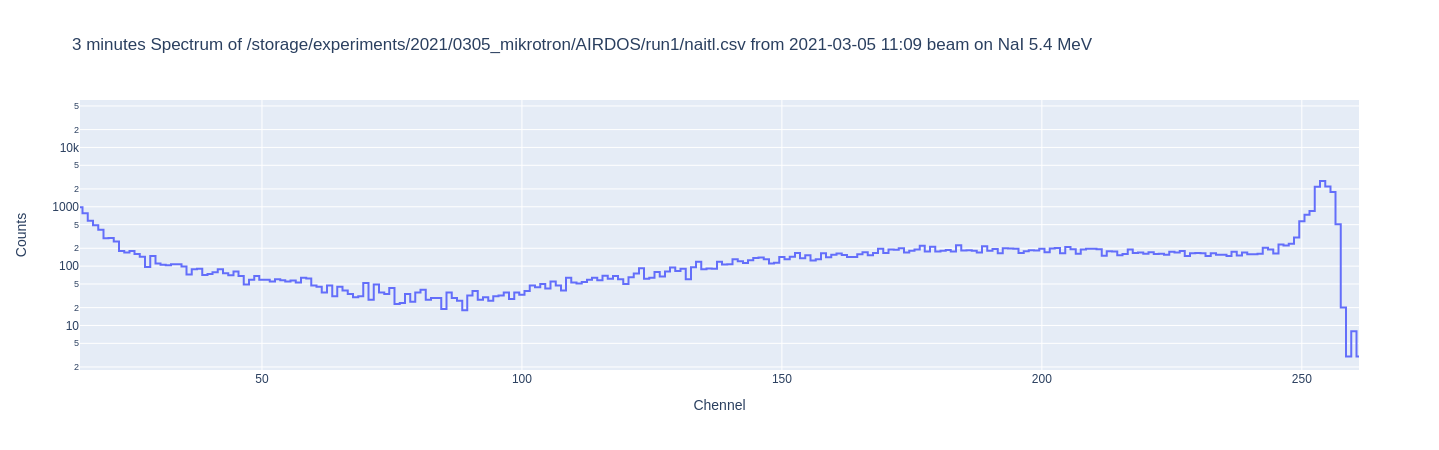

In [8]:
dir = '/storage/experiments/2021/0305_mikrotron/AIRDOS/run*/*'
for fn in glob.glob(dir):

    FROM_CAHNNEL=0
    if 'cry' in fn:
        FROM_CHANNEL = 100 # CRY-19
    if 'naitl' in fn:
        FROM_CHANNEL = 15 # NaI(Tl)
    if 'spacedos' in fn:
        FROM_CHANNEL = 10 # SPACEDOS

    l=[]
    l.extend(range(0,262))
    df = pd.read_csv(fn, sep=',', names=l, header=None, comment='*',engine='python' )
    df = df.reset_index(drop=True)
    rc = df.loc[df[1]=='$CANDY']
    rc.reset_index(drop=True, inplace=True)
    rc = rc.apply(pd.to_numeric, errors='coerce')
    rc['counts'] = rc.iloc[:,FROM_CHANNEL:255].sum(axis=1)
    rc['time'] = pd.to_datetime(rc[0], unit='s', origin='unix') 


    data = [go.Scatter(x=rc['time'], y=rc['counts'])]
    layout = go.Layout(title='Flux '+fn+' from channel '+str(FROM_CHANNEL), yaxis=dict(title='counts', type='log'), xaxis=dict(title='Time'))
    fig = go.Figure(data=data, layout=layout)
    fig.show()
    
    times = [
        ['2021-03-05 10:36','SPACEDOS 5.4 MeV'],
        ['2021-03-05 11:09','NaI 5.4 MeV'],
        ['2021-03-05 11:16','CRY 5.4 MeV'],
        ['2021-03-05 11:59','NaI 7.4 MeV'],
        ['2021-03-05 12:07','CRY 7.4 MeV'],
        ['2021-03-05 12:11','SPACEDOS 7.4 MeV']
    ]
    for FROM, DETECTOR in times:
        TO = pd.to_datetime(FROM) + pd.Timedelta(minutes=3)
        rc.set_index('time', inplace=True, drop=False)
        xc = rc[FROM:TO]
        if len(xc)==0:
            continue
        FROM_CAHNNEL=0
        if 'cry' in f:
            FROM_CHANNEL = 13 # CRY-19
        if 'naitl' in f:
            FROM_CHANNEL = 15 # NaI(Tl)
        if 'spacedos' in f:
            FROM_CHANNEL = 11 # SPACEDOS

        spectrum = xc.iloc[:,FROM_CHANNEL:].sum()

        data = [go.Scatter(x=spectrum.index, y=spectrum, line=dict(shape='hvh'))]

        layout = go.Layout(title='3 minutes Spectrum of '+fn+' from '+str(FROM)+' beam on '+DETECTOR, yaxis=dict(title='Counts', type='log'), xaxis=dict(title='Chennel'))

        fig = go.Figure(data=data, layout=layout)
        fig.show()